In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stat

# Environment
## States: A continuous function of r and theta. Goal State: r = dist. theta = Theta
## Actions: delta_r, delta_theta
## Reward: -1 for every action. +100 to reach the goal state.
## Transition Prob: s, a, s' = 1. s' changes based on condition
### Environment takes a state action pair and returns reward and new state.

In [2]:
#Environment: State = r, theta tuples. 1150*360
#             Goal State: range of r and theta tuples.
#             

In [3]:
environment = numpy.zeros((575, 360))
environment = environment - 1


In [4]:
#Assigning rewards
#hitting the circle

environment[280:320, 40:50] = 10

#On the straight trajectory towards the circle
environment[:50, 44:46] = 1
environment[50:100, 43:47] = 2
environment[100:200, 42:48] = 3
environment[200:280, 41:49] = 4

In [5]:
def step(environment, state, action):
    r, theta = state
    del_r, del_theta = action
    state = (r+del_r)%575, (theta+del_theta)%360
    
    reward = environment[state[0], state[1]]
    #if reward == 10:
    #    print ('Trial Complete')
    return state, reward

In [29]:
#Actions can be defined as change in angles. The change can be max 360 to min 0. del_r is assumed constant for the time being

q_values = numpy.random.rand(575, 360, 360)


In [43]:
#Q Learning Algorithm
#Terminal state q-values are 0. All others are random.
del_r = 7
q_values[300, 40:50, :] = 0
episodes = 1000
alpha = 0.8
gamma = 0.9
for i in range(episodes):
    state = [0, numpy.random.choice(range(360))]
    #plt.imshow(numpy.mean(q_values, axis = 0), cmap='hot')
    while True:
        prev_state = state
        #del_r, del_theta = numpy.unravel_index(numpy.argmax(q_values[state[0], state[1], :, :], axis=None), q_values[state[0], state[1], :, :].shape)
        del_theta = numpy.argmax(q_values[state[0], state[1], :])
        state, reward = step(environment, prev_state, [del_r, del_theta])
        q_values[prev_state[0], prev_state[1], del_theta] = q_values[prev_state[0], prev_state[1], del_theta] + alpha*(reward+gamma*numpy.max(q_values[state[0], state[1], :]) - q_values[prev_state[0], prev_state[1], del_theta])
        #Take Action A (from set of actions a), observe R and S'
        #Q(A, A) = Q(S, A) + alpha*[R + gamma*maxQ(S', a) - Q(S, A)]
        #S <- S'
        #if reward > 0: 
            #print (reward)
        if reward == 10:
            break
    #Until S is terminal


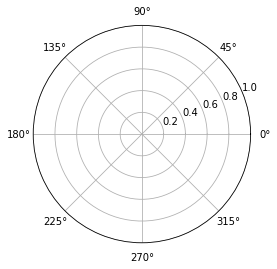

In [44]:
r = numpy.arange(0, 2, 0.01)
theta = 2 * numpy.pi * r

ax = plt.subplot(111, projection='polar')
rstates = list()
thetastates = list()
#ax.plot(theta, r)
#Q Learning Algorithm
#Terminal state q-values are 0. All others are random.
del_r = 7
#q_values[300, 40:50,:, :] = 0
episodes = 1
alpha = 0.1
gamma = 0.9
for i in range(episodes):
    state = [0, numpy.random.choice(range(360))]
    #plt.imshow(numpy.mean(q_values, axis = 0), cmap='hot')
    while True:
        prev_state = state
        #del_r, del_theta = numpy.unravel_index(numpy.argmax(q_values[state[0], state[1], :], axis=None), q_values[state[0], state[1], :].shape)
        del_theta = numpy.argmax(q_values[state[0], state[1], :])
        state, reward = step(environment, prev_state, [del_r, del_theta])
        q_values[prev_state[0], prev_state[1], del_theta] = q_values[prev_state[0], prev_state[1], del_theta] + alpha*(reward+gamma*numpy.max(q_values[state[0], state[1], :]) - q_values[prev_state[0], prev_state[1], del_theta])
        #Take Action A (from set of actions a), observe R and S'
        #Q(A, A) = Q(S, A) + alpha*[R + gamma*maxQ(S', a) - Q(S, A)]
        #S <- S'
        #if reward > 0: 
            #print (reward)
        rstates.append(state[0])
        thetastates.append(state[1])
        if reward == 10:
            break
    #Until S is terminal


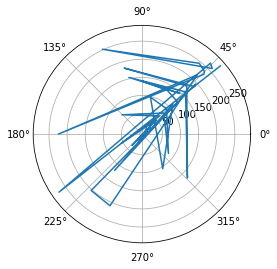

In [45]:
ax = plt.subplot(111, projection='polar')

ax.plot(numpy.array(thetastates)*2*numpy.pi/360, numpy.array(rstates))


In [38]:
numpy.array(thetastates)*(2*numpy.pi)/360

array([2.98451302, 3.9618974 , 0.62831853, 3.33357887, 2.86233997,
       4.97418837, 3.05432619, 3.28121899, 4.93928178, 4.03171057,
       0.82030475, 0.78539816, 0.29670597, 0.80285146, 0.75049158,
       0.80285146, 6.10865238, 2.47836754, 6.0737458 , 3.87463094,
       3.52556509, 0.95993109, 0.90757121, 2.32128791, 0.87266463,
       2.49582083, 1.97222205, 0.89011792, 3.71755131, 0.57595865,
       1.11701072, 0.52359878, 1.58824962, 2.07694181, 4.10152374,
       0.15707963, 5.91666616, 4.34586984, 5.16617459, 4.45058959,
       1.02974426, 0.66322512, 1.93731547, 1.74532925, 5.46288056,
       1.90240888, 4.88692191, 2.3387412 , 1.65806279, 3.92699082,
       5.84685299, 5.3581608 , 6.0737458 , 4.92182849, 2.96705973,
       1.76278254, 2.37364778, 0.54105207, 2.63544717, 1.97222205,
       2.12930169, 6.0562925 , 5.27089434, 0.27925268, 3.66519143,
       4.45058959, 2.46091425, 0.27925268, 0.90757121, 1.60570291,
       5.48033385, 4.69493569, 3.19395253, 5.02654825, 0.80285